In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


In [2]:
reviews = pd.read_json('data/IMDB_reviews.json',lines = True)
movies = pd.read_json('data/IMDB_movie_details_eng.json')
# map to null values the empty strings in the movies dataframe  
movies = movies.replace(r'^\s*$', np.nan, regex=True)

movies.movie_id = movies.movie_id.astype('str')
reviews.movie_id = reviews.movie_id.astype('str')
reviews.review_date = pd.to_datetime(reviews.review_date)
reviews['year'] = reviews.review_date.dt.year


In [3]:
movies.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,title
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",Patriot Games
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...,Last Vegas
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,NaN,Wet Hot American Summer
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,The Treasure of the Sierra Madre
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,Election


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1571
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1339 non-null   object 
 7   title          1572 non-null   object 
dtypes: float64(1), object(7)
memory usage: 110.5+ KB


In [5]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,year
0,2006-02-10,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,2006
1,2000-09-06,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,2000
2,2001-08-03,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,2001
3,2002-09-01,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,2002
4,2004-05-20,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",2004


 # INFO ABOUT MOVIES

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1571
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1339 non-null   object 
 7   title          1572 non-null   object 
dtypes: float64(1), object(7)
memory usage: 110.5+ KB


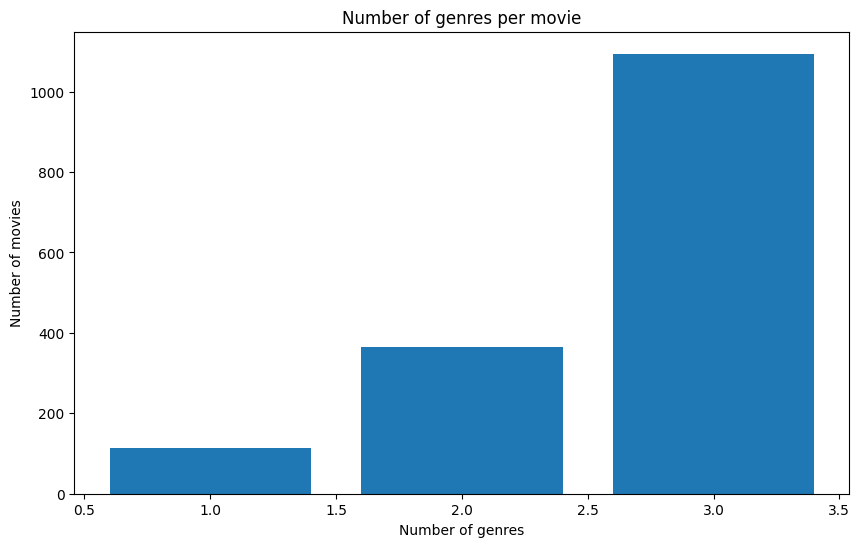

In [7]:
# get the # genres per movie
gen_len =  movies['genre'].apply(lambda x: len(x))
gen_lens = dict(gen_len.value_counts())
#plot the content of this dictionary
plt.figure(figsize=(10,6))
plt.bar(gen_lens.keys(), gen_lens.values())
plt.title('Number of genres per movie')
plt.xlabel('Number of genres')
plt.ylabel('Number of movies')
plt.show()

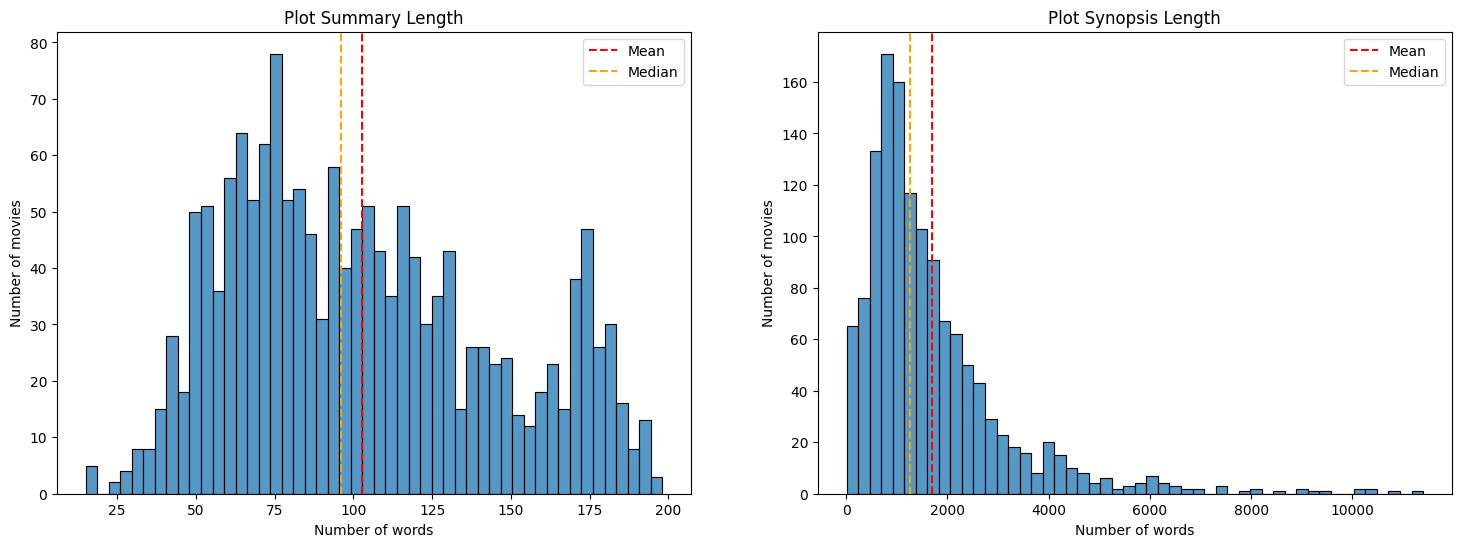

In [8]:
# plot average length of plot summary and synopsis
movies['plot_summary_len'] = movies.plot_summary.apply(lambda x: len(x.split()))
mov_temp = movies[movies.plot_synopsis.apply(lambda x: type(x) == str)].copy()
mov_temp['plot_synopsis_len'] = mov_temp.plot_synopsis.apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(movies['plot_summary_len'], bins=50, ax=ax[0])
#put vertical line on the mean and median and show their values in the legend
ax[0].axvline(movies['plot_summary_len'].mean(), color='red', linestyle='--', label='Mean')
ax[0].axvline(movies['plot_summary_len'].median(), color='orange', linestyle='--')
ax[0].set_title('Plot Summary Length')
ax[0].set_xlabel('Number of words')
ax[0].set_ylabel('Number of movies')
ax[0].legend({'Mean':movies['plot_summary_len'].mean(),'Median':movies['plot_summary_len'].median()})

sns.histplot(mov_temp['plot_synopsis_len'], bins=50, ax=ax[1])
ax[1].axvline(mov_temp['plot_synopsis_len'].mean(), color='red', linestyle='--')
ax[1].axvline(mov_temp['plot_synopsis_len'].median(), color='orange', linestyle='--')
ax[1].set_title('Plot Synopsis Length')
ax[1].set_xlabel('Number of words')
ax[1].set_ylabel('Number of movies')
ax[1].legend({'Mean':mov_temp['plot_synopsis_len'].mean(),'Median':mov_temp['plot_synopsis_len'].median()})
plt.show()

In [9]:
print(len(movies[movies.plot_synopsis.isna()]))


233


In [10]:
diff = set(reviews.movie_id) - set(movies.movie_id)
reviews[reviews.movie_id.isin(diff)].head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,year


# INFO ABOUT REVIEWS

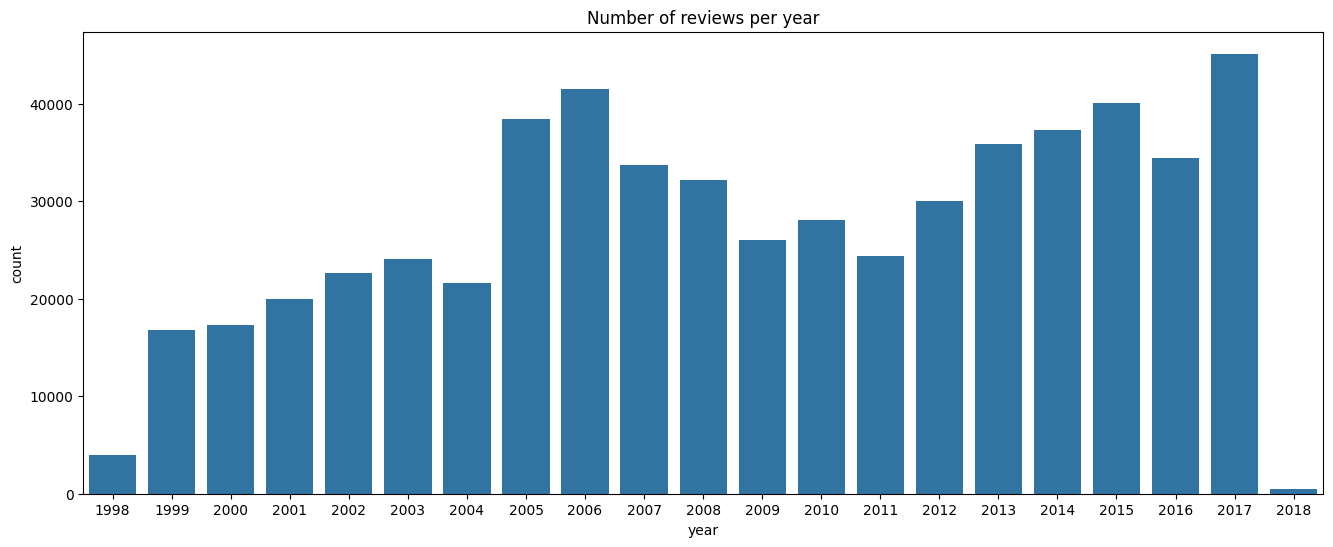

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x='year', data=reviews)
plt.title('Number of reviews per year')
plt.show()


In [12]:
len(reviews[reviews.year == 2018])


528

In [13]:
movies_expl = movies.copy()

In [14]:
a = ' '.join(movies_expl['genre'][0])
re.findall(r'\b\w+\b', a)

['Action', 'Thriller']

In [15]:
type(movies_expl['genre'][0])

list

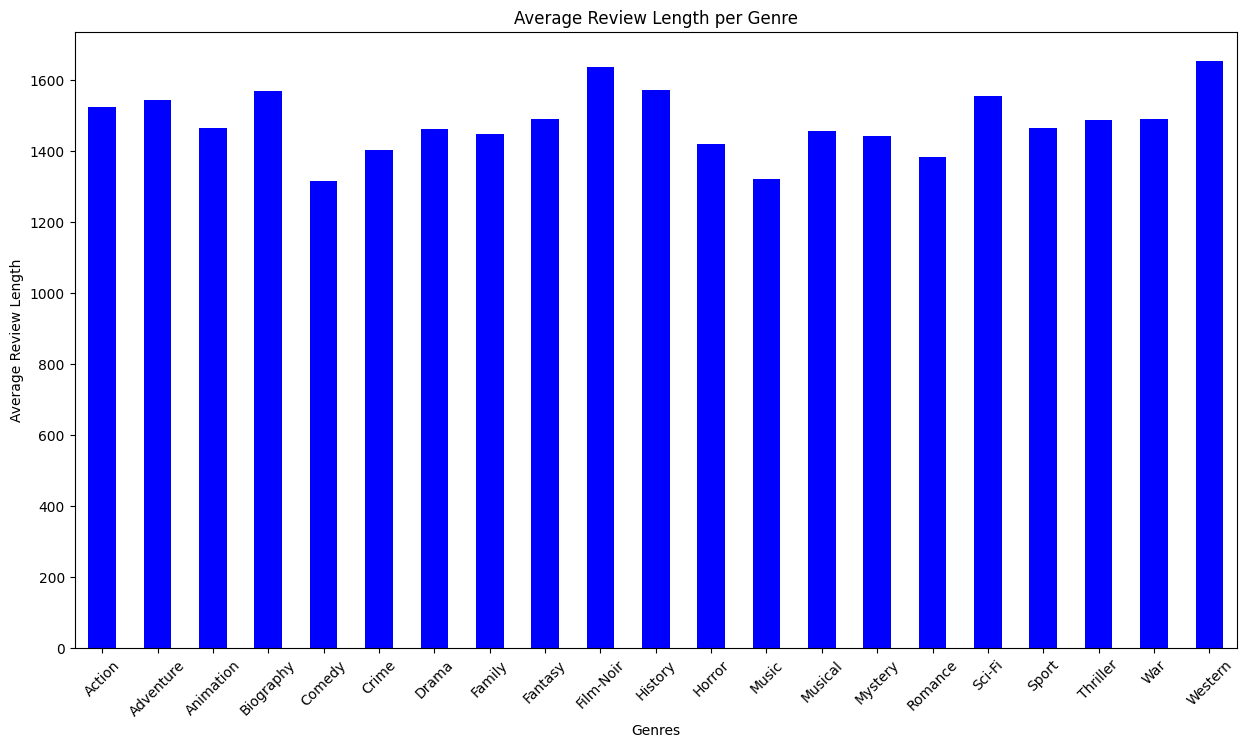

In [16]:
reviews['review_length'] = reviews['review_text'].apply(len)

# movies_expl['genre'] = movies_expl['genre'].apply(lambda x: re.findall(r'\b\w+\b', ' '.join(x)))
movies_expl = movies_expl.explode('genre')
movies_expl['genre'] = movies_expl['genre'].str.strip()

df1 = pd.merge(movies_expl, reviews, on='movie_id')

mean_lengths = df1.groupby('genre')['review_length'].mean()

# Plotting the results
mean_lengths.plot(kind='bar', figsize=(15,8), color='blue')
plt.title('Average Review Length per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Review Length')
plt.xticks(rotation=45)  # Rotate the genre labels for better readability
plt.show()

# SPOILER FOCUSED

In [17]:
df = pd.merge(movies, reviews, on='movie_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movie_id          573913 non-null  object        
 1   plot_summary      573913 non-null  object        
 2   duration          573913 non-null  object        
 3   genre             573913 non-null  object        
 4   rating_x          573913 non-null  float64       
 5   release_date      573913 non-null  object        
 6   plot_synopsis     538828 non-null  object        
 7   title             573913 non-null  object        
 8   plot_summary_len  573913 non-null  int64         
 9   review_date       573913 non-null  datetime64[ns]
 10  user_id           573913 non-null  object        
 11  is_spoiler        573913 non-null  bool          
 12  review_text       573913 non-null  object        
 13  rating_y          573913 non-null  int64         
 14  revi

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_39463/667236186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spoiler_counts.index, y=spoiler_counts.values, palette='viridis')


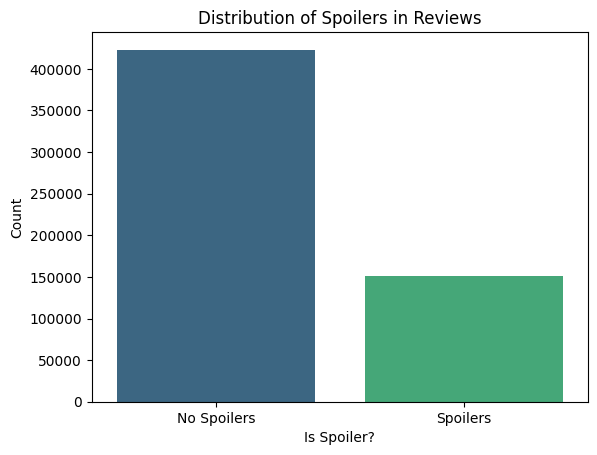

In [18]:
spoiler_counts = df['is_spoiler'].value_counts()


sns.barplot(x=spoiler_counts.index, y=spoiler_counts.values, palette='viridis')
plt.title('Distribution of Spoilers in Reviews')
plt.xlabel('Is Spoiler?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Spoilers', 'Spoilers'])

plt.show()

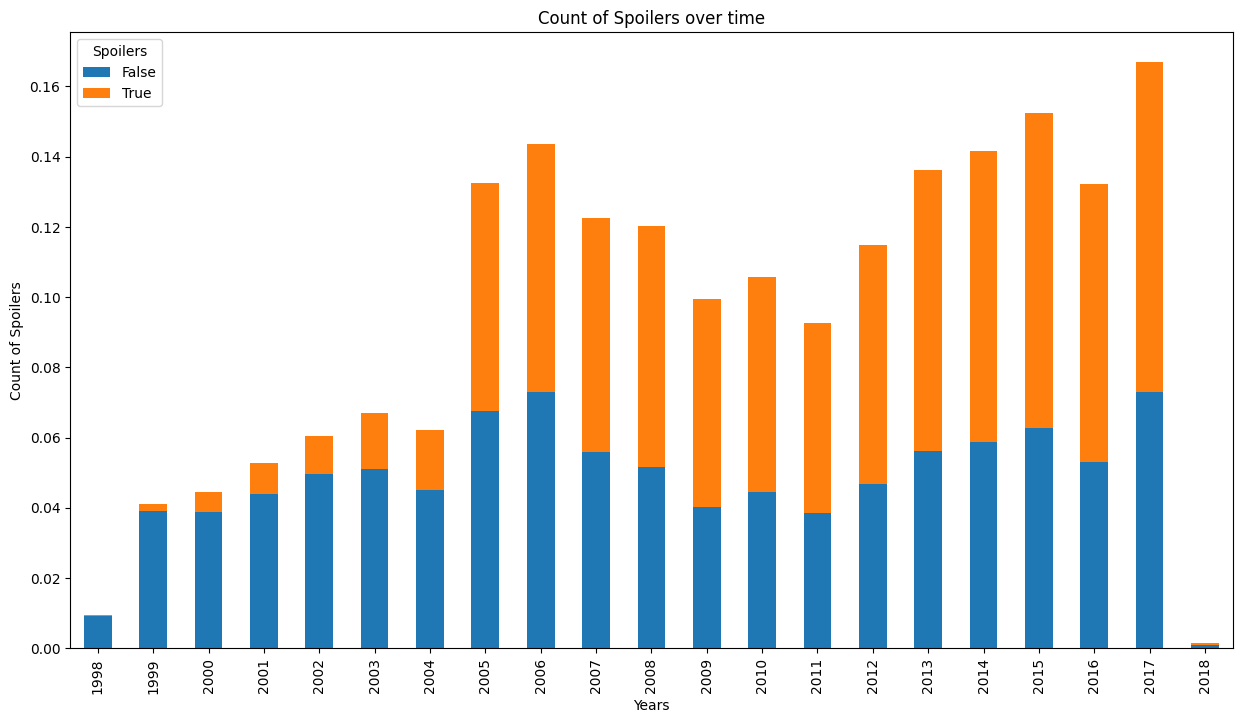

In [19]:
crosstab = pd.crosstab(reviews.year, reviews['is_spoiler'].values, normalize= 'columns')
# plot a crosstab that shows the count of spoilers over time by the spoiler fraction of each year
crosstab.plot(kind='bar', stacked=True,  figsize=(15,8) )
plt.title('Count of Spoilers over time')
plt.xlabel('Years')
plt.ylabel('Count of Spoilers')
plt.legend(title='Spoilers')
plt.show()

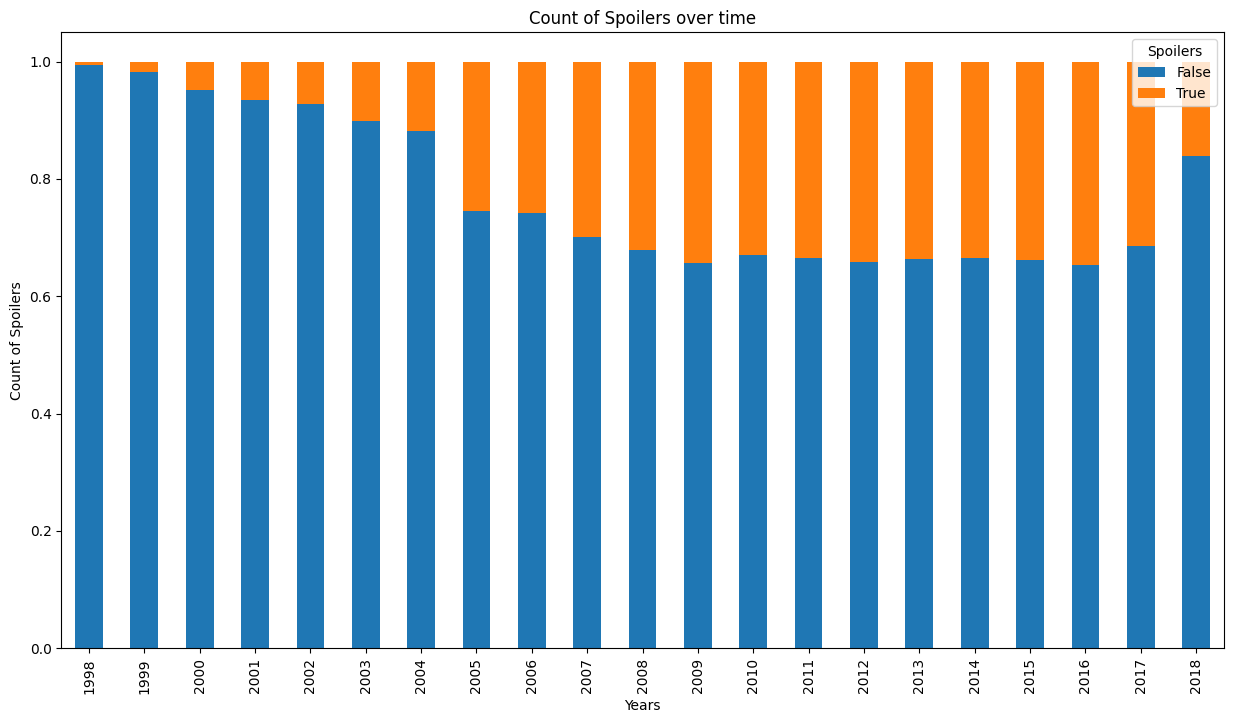

In [68]:
crosstab = pd.crosstab(reviews.year, reviews['is_spoiler'].values, normalize= 'index')
# plot a crosstab that shows the count of spoilers over time by the spoiler fraction of each year

crosstab.plot(kind='bar', stacked=True,  figsize=(15,8) )
plt.title('Count of Spoilers over time')
plt.xlabel('Years')
plt.ylabel('Count of Spoilers')
plt.legend(title='Spoilers')
plt.show()


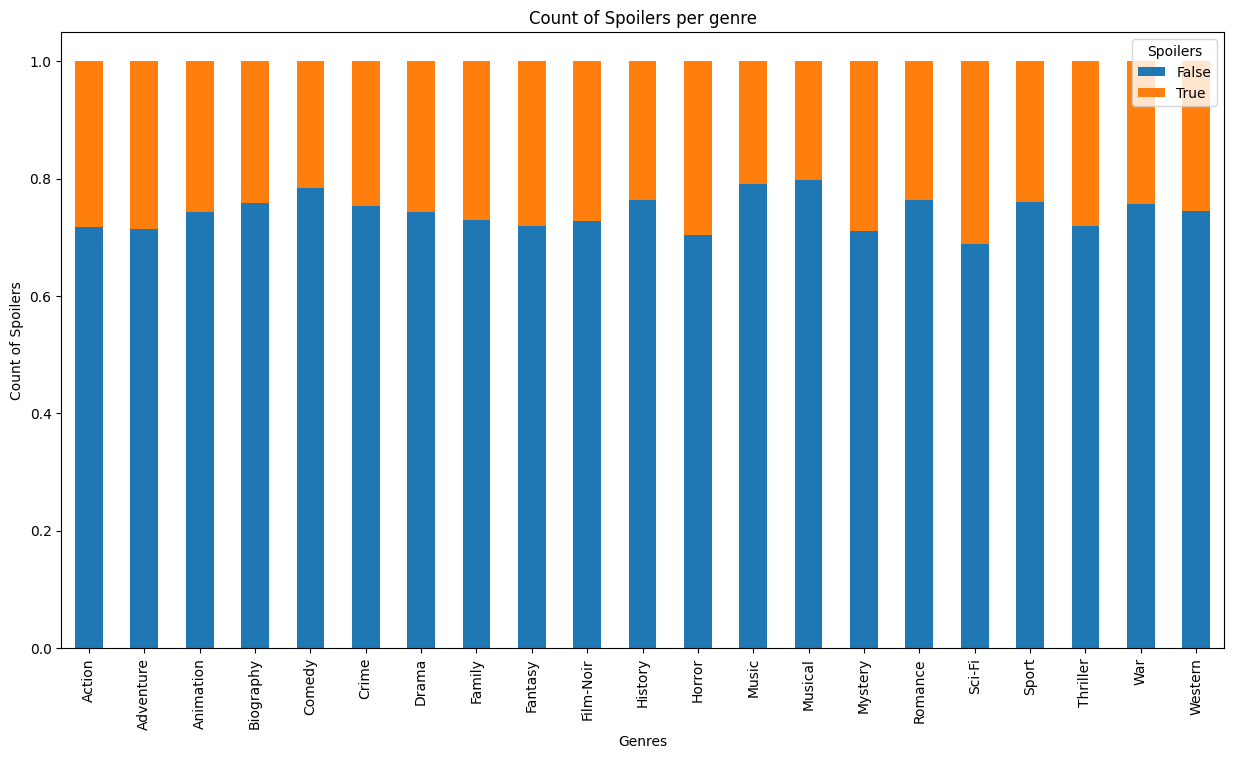

In [70]:
#plot spoilers by genre
# movies.genre = movies.genre.apply(lambda x: re.findall(r'\b\w+\b',x))
movies_ = movies.explode('genre')
movies_['genre'] = movies_.genre.str.strip()
df = pd.merge(movies_, reviews, on='movie_id')
crosstab = pd.crosstab(df.genre, df['is_spoiler'].values, normalize= 'index')
crosstab.plot(kind='bar', stacked=True,  figsize=(15,8) )
plt.title('Count of Spoilers per genre')
plt.xlabel('Genres')
plt.ylabel('Count of Spoilers')
plt.legend(title='Spoilers')
plt.show()

c:\Users\lepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lepol\App

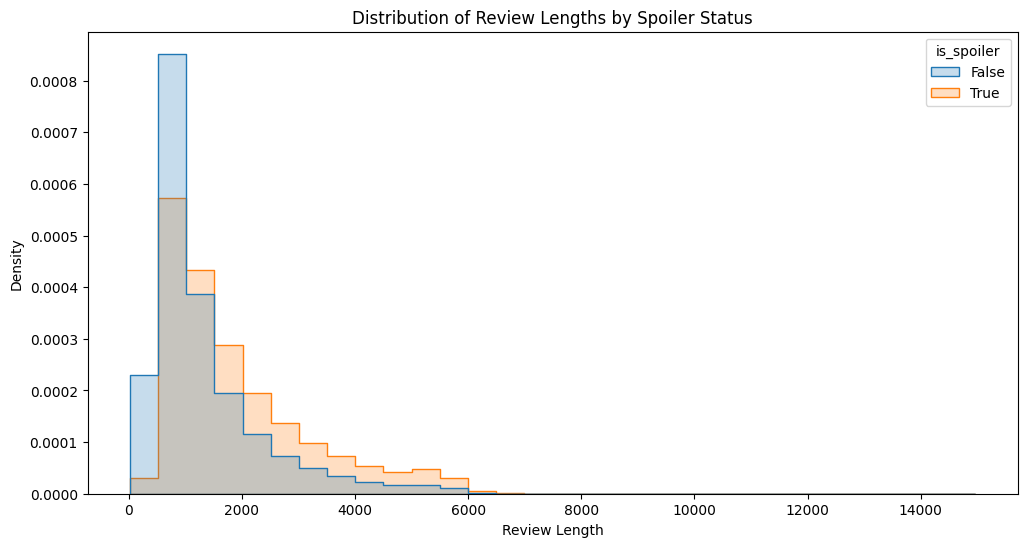

In [71]:
df['review_length'] = df['review_text'].apply(len)


plt.figure(figsize=(12, 6))


sns.histplot(data=df, x='review_length', hue='is_spoiler', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of Review Lengths by Spoiler Status')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

### Flesch Reading Ease Score

The Flesch Reading Ease score is a numerical scale used to assess the readability of a text. It calculates this score based on the average length of the sentences and the average number of syllables per word within the text. The score ranges from 0 to 100, where higher scores signify texts that are easier to understand. Typically, a score between 60 and 70 is considered suitable for a general audience, indicating that the text is clear and straightforward. This tool is valuable for ensuring content is accessible and comprehensible for the intended readers.


In [72]:
%pip install textstat


   ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
   -------------------------------------- - 102.4/105.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 105.1/105.1 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB ? eta -:--:--
   ------ --------------------------------- 0.3/2.1 MB 2.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.1 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.1/2.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.5/2.1 MB 4.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 5.1 MB/s eta 0:00:01
   --------------------------

In [73]:
import textstat

df['flesch_reading_ease'] = df['review_text'].apply(textstat.flesch_reading_ease)

In [74]:
#The Flesch Reading Ease score ranges from 100 (easy to understand) to 0 (very difficult to understand).

average_scores_flesch = df.groupby('is_spoiler')['flesch_reading_ease'].mean()
print(average_scores_flesch)


is_spoiler
False    71.260599
True     70.011825
Name: flesch_reading_ease, dtype: float64


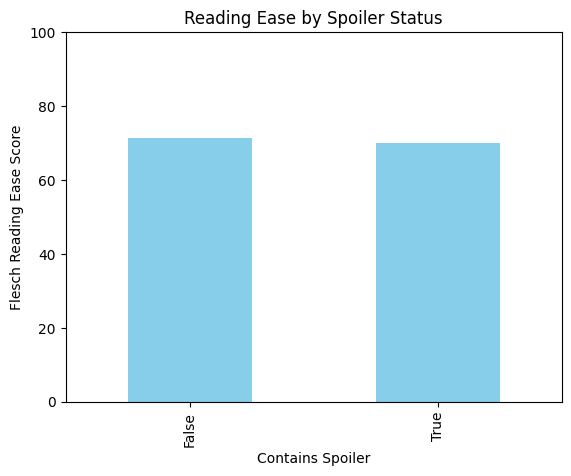

In [75]:
average_scores_flesch.plot(kind='bar', color='skyblue')
plt.title('Reading Ease by Spoiler Status')
plt.xlabel('Contains Spoiler')
plt.ylabel('Flesch Reading Ease Score')
plt.ylim(0, 100)
plt.show()

# Balance

In [76]:
df.genre[df.is_spoiler == True].value_counts()

genre
Drama        74230
Action       53897
Adventure    53734
Sci-Fi       29823
Comedy       29315
Crime        27011
Thriller     26771
Fantasy      21694
Mystery      18541
Romance      16155
Horror       13879
Family       10702
Biography     7992
Animation     6834
History       5668
War           2486
Sport         2012
Music         1838
Western       1209
Musical       1120
Film-Noir      488
Name: count, dtype: int64

In [77]:
df['review_len'] = df.review_text.apply(lambda x: len(x.split()))

In [78]:
df['after'] = df.year >= 2005

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522747 entries, 0 to 1522746
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   movie_id             1522747 non-null  object        
 1   plot_summary         1522747 non-null  object        
 2   duration             1522747 non-null  object        
 3   genre                1522747 non-null  object        
 4   rating_x             1522747 non-null  float64       
 5   release_date         1522747 non-null  object        
 6   plot_synopsis        1430664 non-null  object        
 7   title                1522747 non-null  object        
 8   plot_summary_len     1522747 non-null  int64         
 9   review_date          1522747 non-null  datetime64[ns]
 10  user_id              1522747 non-null  object        
 11  is_spoiler           1522747 non-null  bool          
 12  review_text          1522747 non-null  object        
 1

In [80]:
from scipy.stats import ttest_ind

In [81]:
# get dummies for genre
genre_dummies = pd.get_dummies((df['genre'].astype('str')), dtype = int)



In [82]:
df_bal = pd.concat([df, genre_dummies], axis=1)

In [83]:
bal_cols = ['rating_x', 'plot_summary_len', 'review_len', 'rating_y'] + list(genre_dummies.columns)

In [84]:
features = []
diffs = []
pvals = []
for col in bal_cols:
    diff = df_bal.loc[df_bal['after'] == True, col].mean() - df_bal.loc[df_bal['after'] == False, col].mean()
    ttest = ttest_ind(df_bal.loc[df_bal['after'] == True, col], df_bal.loc[df_bal['after'] == False, col], equal_var=True)
    features.append(col)
    diffs.append(diff)
    pvals.append(ttest.pvalue)

ttest_df = pd.DataFrame({'feature': features, 'diff': diffs, 'pval': pvals})

In [85]:
ttest_df.loc[abs(ttest_df['diff']) >= 0.01]

,feature,diff,pval
0,rating_x,0.043552,2.068314e-119
1,plot_summary_len,-1.929271,8.960219e-124
2,review_len,97.277726,0.000000e+00
3,rating_y,-0.503826,0.000000e+00
4,Action,0.022405,4.261410e-258
5,Adventure,0.018225,3.985889e-174
8,Comedy,-0.027848,0.000000e+00
9,Crime,-0.010190,7.948753e-89
10,Drama,-0.013735,1.819209e-70
19,Romance,-0.013305,6.027359e-233
